In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

C:\Users\subham\.conda\envs\hsn\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\subham\.conda\envs\hsn\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\subham\.conda\envs\hsn\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\subham\.conda\envs\hsn\lib\site-packages\tensorflow\python\framework\dtypes.

In [4]:
movies_df = pd.read_csv('D:\\HSNProjects\\ML\\Movie recommendation system\\Input\\movies.dat', sep='::', header=None)


C:\Users\subham\.conda\envs\hsn\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
movies_df.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_df = pd.read_csv('D:\\HSNProjects\\ML\\Movie recommendation system\\Input\\ratings.dat', sep='::', header=None)

C:\Users\subham\.conda\envs\hsn\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
ratings_df.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
movies_df.columns=["MovieID","Title","Genres"]
ratings_df.columns=["UserID","MovieID","Ratings","Timestamp"]

In [8]:
len(movies_df)
movies_df['List Index']=movies_df.index
movies_df.head()

,MovieID,Title,Genres,List Index
0,1,Toy Story (1995),Animation|Children's|Comedy,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama,3
4,5,Father of the Bride Part II (1995),Comedy,4


In [9]:
merge_df=movies_df.merge(ratings_df, on='MovieID')
merge_df=merge_df.drop('Timestamp', axis=1).drop('Title', axis=1).drop('Genres', axis=1)

In [10]:
merge_df.head(25)

,MovieID,List Index,UserID,Ratings
0,1,0,1,5
1,1,0,6,4
2,1,0,8,4
3,1,0,9,5
4,1,0,10,5
5,1,0,18,4
6,1,0,19,5
7,1,0,21,3
8,1,0,23,4
9,1,0,26,3


In [11]:
usergroup=merge_df.groupby('UserID')
usergroup.first()

,MovieID,List Index,Ratings
UserID,,,
1,1,0,5
2,21,20,1
3,104,102,4
4,260,257,5
5,6,5,2
...,...,...,...
6036,4,3,2
6037,17,16,4
6038,232,229,4


In [14]:
amountOfUsedUsers = 1000
trx=[]
for userID, curUser in usergroup:
    temp = [0]*len(movies_df)
    for num, movie in curUser.iterrows():
        temp[movie['List Index']]=movie['Ratings']/5.0
    trx.append(temp)
    if amountOfUsedUsers == 0:
        break
    amountOfUsedUsers -= 1


In [15]:
hiddenUnits = 20
visibleUnits = len(movies_df)
vb = tf.placeholder("float", [visibleUnits]) 
hb = tf.placeholder("float", [hiddenUnits])  
w=tf.placeholder("float", [visibleUnits, hiddenUnits])

In [16]:
v0=tf.placeholder("float",[None, visibleUnits])
_h0=tf.nn.sigmoid(tf.matmul(v0, w)+hb)  #probabilities of the hidden units
h0=tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))


In [17]:
_v1=tf.nn.sigmoid(tf.matmul(h0, tf.transpose(w))+vb)
v1=tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1=tf.nn.sigmoid(tf.matmul(v1, w)+hb)

In [18]:
alpha=1.0
w_pos_grad=tf.matmul(tf.transpose(v0),h0)
w_neg_grad=tf.matmul(tf.transpose(v1),h1)

In [19]:
CD=(w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])
update_w=w+alpha*CD
update_vb=vb + alpha*tf.reduce_mean(v0-v1,0)
update_hb=hb + alpha*tf.reduce_mean(h0-h1,0)

err_sum=tf.reduce_mean(tf.square(v0-v1))


Instructions for updating:
Use `tf.cast` instead.


In [20]:
cur_w=np.zeros([visibleUnits,hiddenUnits],np.float32)
cur_vb=np.zeros([visibleUnits], np.float32)
cur_hb=np.zeros([hiddenUnits], np.float32)
prv_w=np.zeros([visibleUnits,hiddenUnits],np.float32)
prv_vb=np.zeros([visibleUnits], np.float32)
prv_hb=np.zeros([hiddenUnits], np.float32)
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

In [21]:
epochs = 15
batchsize = 100
errors=[]
for i in range(epochs):
    for start, end in zip(range(0, len(trx), batchsize), range(batchsize, len(trx), batchsize)):
        batch = trx[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, w: prv_w, vb: prv_vb, hb: prv_hb} )
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, w: prv_w, vb: prv_vb, hb: prv_hb} )
        cur_hb = sess.run(update_hb, feed_dict={v0: batch, w: prv_w, vb: prv_vb, hb: prv_hb} )
        prv_w=cur_w
        prv_vb=cur_vb
        prv_hb=cur_hb
    errors.append(sess.run(err_sum, feed_dict={v0: trx, w: cur_w, vb: cur_vb, hb: cur_hb} ))

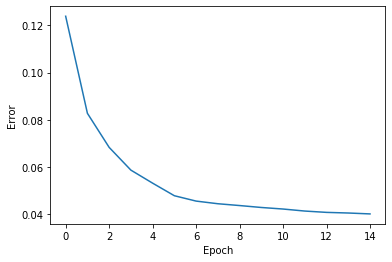

In [22]:
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [23]:
inputuser = [trx[500]]

In [24]:
hh0 = tf.nn.sigmoid(tf.matmul(v0, w)+hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(w))+vb)
feed = sess.run(hh0, feed_dict={v0: inputuser, w:prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={hh0:feed ,w:prv_w ,vb:prv_vb   })

In [25]:
movies_df["Recommendation Score"] = rec[0]
movies_df.sort_values(["Recommendation Score"], ascending=False).head(5)

,MovieID,Title,Genres,List Index,Recommendation Score
476,480,Jurassic Park (1993),Action|Adventure|Sci-Fi,476,0.714350
585,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,585,0.478013
2789,2858,American Beauty (1999),Comedy|Drama,2789,0.445678
3509,3578,Gladiator (2000),Action|Drama,3509,0.439265
3684,3753,"Patriot, The (2000)",Action|Drama|War,3684,0.364334


In [26]:
movies_df.head()

,MovieID,Title,Genres,List Index,Recommendation Score
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0.076417
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1,0.008846
2,3,Grumpier Old Men (1995),Comedy|Romance,2,0.023316
3,4,Waiting to Exhale (1995),Comedy|Drama,3,0.000824
4,5,Father of the Bride Part II (1995),Comedy,4,0.002858


In [27]:
movies_df.to_csv('D:\\HSNProjects\\ML\\Movie recommendation system\\Output\\outputhsn.csv', index = False)